# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.2MB/s 


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
project_data.head(2)

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23
1      140945  p258326  ...  299.0        1

[2 rows x 19 columns]

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 20 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:02<00:00, 1747.49it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [0]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0  ...                                preprocessed_essays
0      160221  ...  my students english learners working english s...
1      140945  ...  our students arrive school eager learn they po...

[2 rows x 20 columns]

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# printing some random project title.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [0]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

We Need To Move It While We Input It!


In [0]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bars
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 40529.59it/s]


In [0]:
#after preprocessing
preprocessed_titles[20000]

'we need to move it while we input it'

In [0]:
project_data['preprocessed_titles'] = preprocessed_titles
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0  ...                        preprocessed_titles
0      160221  ...  educational support english learners home
1      140945  ...           wanted projector hungry learners

[2 rows x 20 columns]

### 1.5 Preprocessing project_resource_summary

In [0]:
# printing some random project_resource_summary.
print(project_data['project_resource_summary'].values[0])
print("="*50)
print(project_data['project_resource_summary'].values[150])
print("="*50)
print(project_data['project_resource_summary'].values[1000])
print("="*50)
print(project_data['project_resource_summary'].values[20000])
print("="*50)
print(project_data['project_resource_summary'].values[99999])
print("="*50)

My students need opportunities to practice beginning reading skills in English at home.
My students need 5 Hokki stools to increase their movement even while sitting.
My students need nautical themed items such as red throw pillows and photo booth props for a great start to a new 4th grade year!
My students need wobble chairs, number toss games and colors and shapes mats to make our learning fun, hands on and physically engaging!
My students need a CD bluetooth player so they can hear their music clearly and I can already have it on my phone for great transitions. Plus the flannel/ easel for mobility.


In [0]:
sent = decontracted(project_data['project_resource_summary'].values[20000])
print(sent)
print("="*50)

My students need wobble chairs, number toss games and colors and shapes mats to make our learning fun, hands on and physically engaging!


In [0]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_resources = []
# tqdm is for printing the status bars
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('My students need', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_resources.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:05<00:00, 19707.19it/s]


In [0]:
preprocessed_resources[20000]

'wobble chairs number toss games colors shapes mats make learning fun hands physically engaging'

In [0]:
project_data['preprocessed_resources'] = preprocessed_resources
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0  ...                             preprocessed_resources
0      160221  ...  opportunities practice beginning reading skill...
1      140945  ...        projector help viewing educational programs

[2 rows x 20 columns]

### 1.6 Preprocessing teacher_prefix

In [0]:
x = project_data['teacher_prefix'].replace(to_replace= np.nan, value= "mrs")
teacher_prefix_list = list(x.values)
preprocessed_teacher_prefix=[]
for l in tqdm (teacher_prefix_list):
    n = ""
    for e in l:
        e = e.replace('.', '')
        e = e.replace(',', '')
        n+= e
    preprocessed_teacher_prefix.append(n.lower().strip())

print(len(preprocessed_teacher_prefix))

100%|██████████| 109248/109248 [00:00<00:00, 437852.19it/s]

109248


In [0]:
project_data['preprocessed_teacher_prefix'] = preprocessed_teacher_prefix
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0  ... preprocessed_teacher_prefix
0      160221  ...                         mrs
1      140945  ...                          mr

[2 rows x 20 columns]

In [0]:
from collections import Counter
my_counter = Counter()
for word in project_data['preprocessed_teacher_prefix'].values:
    word= str(word)
    my_counter.update(word.split())

In [0]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))
print(sorted_teacher_prefix_dict)

{'dr': 13, 'teacher': 2360, 'mr': 10648, 'ms': 38955, 'mrs': 57272}


### 1.7 Preprocessing project_grade_category

In [0]:
project_grade_category_list = list(project_data['project_grade_category'].values)
preprocessed_project_grade_category=[]
for l in tqdm (project_grade_category_list):
    n = ""
    for e in l:
        e = e.replace(' ', '_')
        e = e.replace('-', '_')
        n+= e
    preprocessed_project_grade_category.append(n.lower().strip())

print(len(preprocessed_project_grade_category))

100%|██████████| 109248/109248 [00:00<00:00, 158446.32it/s]

109248


In [0]:
project_data['preprocessed_project_grade_category'] = preprocessed_project_grade_category
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0  ... preprocessed_project_grade_category
0      160221  ...                       grades_prek_2
1      140945  ...                          grades_6_8

[2 rows x 20 columns]

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [0]:
project_data.to_csv('data.csv',index=False)

In [0]:
data = pd.read_csv('data.csv')
data.head(2)

Unnamed: 0  ... preprocessed_project_grade_category
0      160221  ...                       grades_prek_2
1      140945  ...                          grades_6_8

[2 rows x 20 columns]

In [0]:
y_train = data['project_is_approved'].values
X_train = data.drop(['project_is_approved'], axis=1)
X_train.head(2)

Unnamed: 0  ... preprocessed_project_grade_category
0      160221  ...                       grades_prek_2
1      140945  ...                          grades_6_8

[2 rows x 19 columns]

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 2.2.1. encoding categorical features: clean_category

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
#X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
#print(X_cv_categories_ohe.shape, y_cv.shape)
#print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109248, 9) (109248,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### 2.2.2.encoding categorical features: clean_sub_category

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
#X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
#print(X_cv_subcategories_ohe.shape, y_cv.shape)
#print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109248, 30) (109248,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### 2.2.3. encoding categorical features: School State

In [0]:
state_vectorizer = CountVectorizer()
state_vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = state_vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
#X_test_state_ohe = state_vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
#print(X_test_state_ohe.shape, y_test.shape)
print(state_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109248, 51) (109248,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.2.4 encoding categorical features: teacher_prefix

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['preprocessed_teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer.transform(X_cv['preprocessed_teacher_prefix'].values)
#X_test_teacher_ohe = vectorizer.transform(X_test['preprocessed_teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
#print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109248, 5) (109248,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [0]:
project_data['preprocessed_teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: preprocessed_teacher_prefix, dtype: int64

### 2.2.5. encoding categorical features: project_grade_category

In [0]:
grade_vectorizer = CountVectorizer()
grade_vectorizer.fit(X_train['preprocessed_project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = grade_vectorizer.transform(X_train['preprocessed_project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
#X_test_grade_ohe = grade_vectorizer.transform(X_test['preprocessed_project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
#print(X_test_grade_ohe.shape, y_test.shape)
print(grade_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(109248, 4) (109248,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 2.2.6. encoding numerical features: price

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of sthis data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
#price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
print(price_standardized_train.shape,y_train.shape)
#print(price_standardized_test.shape,y_test.shape)

Mean : 298.1193425966608, Standard deviation : 367.49634838483496
(109248, 1) (109248,)


In [0]:
price_standardized_train

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 2.2.7 encoding numerical features: teacher_number_of_previously_posted_projects


In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

prev_projects_scalar = StandardScaler()
prev_projects_scalar.fit((X_train['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prev_projects_standardized_train = prev_projects_scalar.transform((X_train['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1, 1))
#prev_projects_standardized_test = prev_projects_scalar.transform((X_test['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1, 1))
print(prev_projects_standardized_train.shape,y_train.shape)
#print(prev_projects_standardized_test.shape,y_test.shape)

Mean : 11.153165275336848, Standard deviation : 27.77702641477403
(109248, 1) (109248,)


In [0]:
print(prev_projects_standardized_train)

[[-0.40152481]
 [-0.14951799]
 [-0.36552384]
 ...
 [-0.29352189]
 [-0.40152481]
 [-0.40152481]]


### 2.2.7 encoding numerical features: quantity

In [0]:
quantity_scalar = StandardScaler()
quantity_scalar.fit((X_train['quantity'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
quantity_standardized_train = quantity_scalar.transform((X_train['quantity'].values.astype(float)).reshape(-1, 1))
#quantity_standardized_test = quantity_scalar.transform((X_test['quantity'].values.astype(float)).reshape(-1, 1))
print(quantity_standardized_train.shape,y_train.shape)
#print(quantity_standardized_test.shape,y_test.shape)

Mean : 16.965610354422964, Standard deviation : 26.182821919093175
(109248, 1) (109248,)


In [0]:
print(quantity_standardized_train)

[[ 0.23047132]
 [-0.60977424]
 [ 0.19227834]
 ...
 [-0.4951953 ]
 [-0.03687954]
 [-0.45700232]]


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Bag of words on preprocessed_essays

In [0]:
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
#print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
#X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
#print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(109248, 19) (109248,)
After vectorizations
(109248, 5000) (109248,)


### 2.3.2 Bag of words on preprocessed_titles

In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
#print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_titles'].values)
#X_cv_title_bow = vectorizer.transform(X_cv['preprocessed_titles'].values)
#X_test_title_bow = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
#print(X_cv_title_bow.shape, y_cv.shape)
#print(X_test_title_bow.shape, y_test.shape)
print("="*100)


(109248, 19) (109248,)
After vectorizations
(109248, 5000) (109248,)


### 2.3.3. Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(X_train_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_train_state_ohe.shape)
print(X_train_grade_ohe.shape)
print(X_train_essay_bow.shape)
print(price_standardized_train.shape)

(109248, 9)
(109248, 30)
(109248, 51)
(109248, 4)
(109248, 5000)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_title_bow, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, prev_projects_standardized_train)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()
#X_te = hstack((X_test_essay_bow, X_test_title_bow, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
#print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(109248, 10102) (109248,)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k=5000).fit_transform(X_tr, y_train)
X_new.shape

(109248, 5000)

In [0]:
X_new = X_new[:10000]
X_new.shape

(10000, 5000)

<h2>2.5 Apply Kmeans</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.cluster import KMeans
n_clstr = [2,4,5,7,8]
inertia = []
for k in tqdm(n_clstr, position= 0, leave= True):
    #print(k)
    kmeans = KMeans(n_clusters= k, random_state=0,n_jobs= -1).fit(X_new)
    inertia.append(kmeans.inertia_)
 

100%|██████████| 5/5 [1:25:03<00:00, 1020.74s/it]


Text(0.5, 1.0, 'Elbow/Knee method')

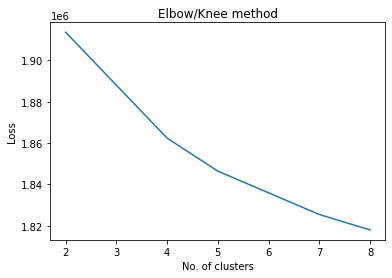

In [0]:
#plot elbow-knee method
plt.plot(n_clstr,inertia)
plt.xlabel("No. of clusters")
plt.ylabel("Loss")
plt.title("Elbow/Knee method")

In [0]:
optimal_k = 5
kmeans= KMeans(n_clusters = optimal_k, random_state= 0, n_jobs= -1).fit(X_new)


In [0]:
print(kmeans.labels_)

[2 0 4 ... 1 2 0]


In [0]:
np.unique(kmeans.labels_, return_counts= True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1785, 3001, 2860,  958, 1396]))

In [0]:
essay = preprocessed_essays
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essay[i])
    elif kmeans.labels_[i]==1 :
        cluster2.append(essay[i])
    elif kmeans.labels_[i]==2 :
        cluster3.append(essay[i])
    elif kmeans.labels_[i]==3 :
        cluster4.append(essay[i]) 
    elif kmeans.labels_[i]==4 :
        cluster5.append(essay[i]) 
   

In [0]:
print('Length of cluster1 is', len(cluster1))
print('Length of cluster2 is', len(cluster2))
print('Length of cluster3 is', len(cluster3))
print('Length of cluster4 is', len(cluster4))
print('Length of cluster5 is', len(cluster5))


Length of cluster1 is 1785
Length of cluster2 is 3001
Length of cluster3 is 2860
Length of cluster4 is 958
Length of cluster5 is 1396


In [0]:
print(cluster2[1000])

i 26 students kindergarten classroom my class diverse i students many different levels my kindergartners full life big bright smiles they get excited school learning they intelligent always asking questions my students constantly learning observing exploring new skills practice experience two things know important although school sets bar high kindergarten students always exceed expectations kindergarten truly rewarding many ways i love watch students grow throughout year we live time technology growing advancing students surrounded technology every day access daily classroom the addition 3 kindle fire tablets classroom help students practice skills learning classroom fun interesting way giving important opportunity use technology learn they chance practice skills fun games websites daily skills reinforced my students love watch educational videos play interactive games using technology i not wait able use tablets classroom nannan


In [0]:
import nltk
import string
from nltk.corpus import stopwords

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS
def wordcloud(cluster_val):
    comment_words = ' '
    stopwords = ["nannan"] + list(STOPWORDS)
    for val in cluster_val:
        val = str(val) # typecaste each val to string
        tokens = val.split()  # split the value
      # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
            
        for words in tokens: 
            comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 500, height = 500, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
  # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

WordCloud with essay text for cluster1 for KMeans


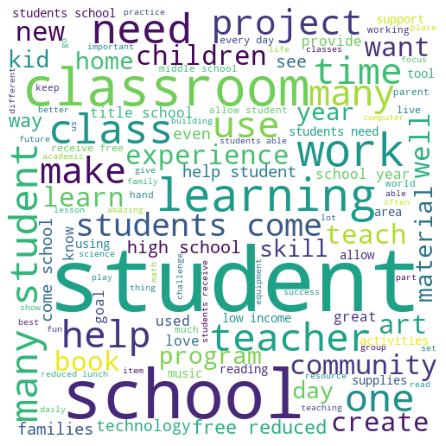

In [0]:
print('WordCloud with essay text for cluster1 for KMeans')
wordcloud(cluster1)


The most frequent words in cluster1 for kmeans are(in descending order): student, school, classroom, learning, work, need, help, project.

WordCloud with essay text for cluster2 for KMeans


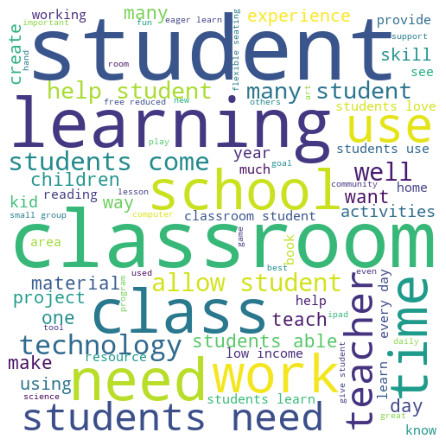

In [0]:
print('WordCloud with essay text for cluster2 for KMeans')
wordcloud(cluster2)

The most frequent words in cluster2 for kmeans are(in descending order): classroom, student, learning, class, need, work, use.




In [0]:
cluster3[100]

'my 4th grade students smart creative intelligent they story many sad depressing working low income community children put smile try best it hard create atmosphere fully rich materials the school i work old poor neighborhood these students deserve best truly want best not cards my school lacks materials many supplies limited a notebook create writing poetry notes a folder hold opinion piece wrote favorite poem pencils create inspire writer reader map favorite place wish visit these basic needs student families struggle supply i teacher struggle keep supplies stocked each subject i teach students need place write take notes research hold work i go pencils need take home night we lack computers i still write chalk board i use many things i want students children public schools nannan'

WordCloud with essay text for cluster3 for KMeans


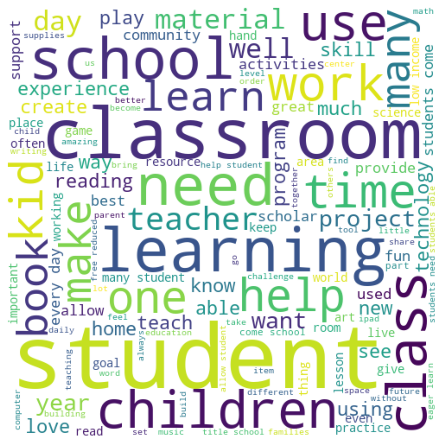

In [0]:
print('WordCloud with essay text for cluster3 for KMeans')
wordcloud(cluster3)

The most frequent words in cluster3 for kmeans are(in descending order): classroom, student, learning, children, school, need, time.

WordCloud with essay text for cluster4 for KMeans


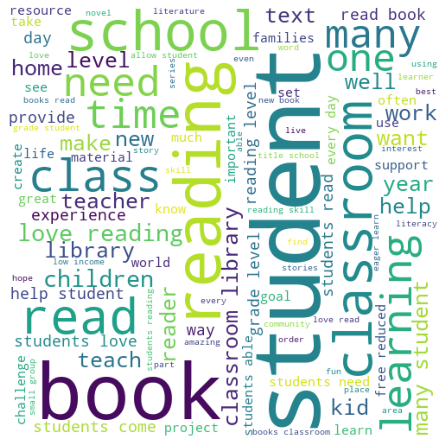

In [0]:
print('WordCloud with essay text for cluster4 for KMeans')
wordcloud(cluster4)

The most frequent words in cluster4 for kmeans are(in descending order): student, reading, book, classroom, school, learning, read.

WordCloud with essay text for cluster5 for KMeans


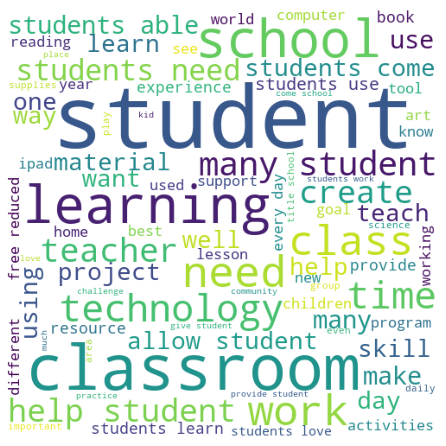

In [0]:
print('WordCloud with essay text for cluster5 for KMeans')
wordcloud(cluster5)

The most frequent words in cluster5 for kmeans are(in descending order): student, classroom, learning, school, technology, work.


<h2>2.6 Apply AgglomerativeClustering</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
X_new1= X_new[:5000]
X_new1.shape

(5000, 5000)

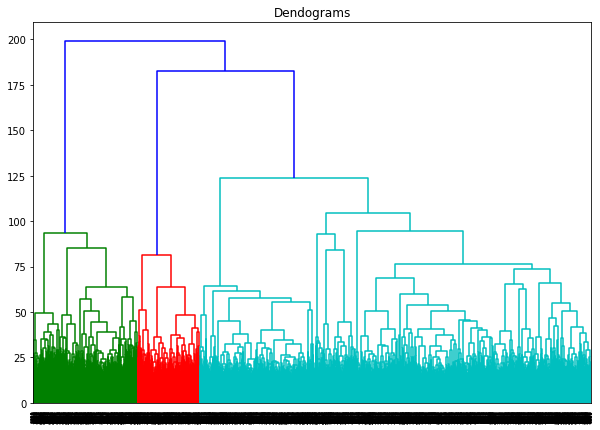

In [0]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
import scipy.cluster.hierarchy as shc
data = X_new1.toarray()[:5000]
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 4 clusters. So from dendrogram we conclude that the number of clusters is equal to 4.

In [0]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters= 4, affinity='euclidean',linkage= 'ward').fit(data)
clustering.fit_predict(data)     

array([0, 3, 1, ..., 0, 2, 3])

In [0]:
np.unique(clustering.labels_, return_counts= True)

(array([0, 1, 2, 3]), array([2473,  940,  554, 1033]))

In [0]:
essay = preprocessed_essays
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
for i in range(clustering.labels_.shape[0]):
    if clustering.labels_[i] == 0:
        cluster1.append(essay[i])
    elif clustering.labels_[i]==1 :
        cluster2.append(essay[i])
    elif clustering.labels_[i]==2 :
        cluster3.append(essay[i])
    elif clustering.labels_[i]==3 :
        cluster4.append(essay[i])
    


In [0]:
print('Length of cluster1 is', len(cluster1))
print('Length of cluster2 is', len(cluster2))
print('Length of cluster3 is', len(cluster3))
print('Length of cluster4 is', len(cluster4))

Length of cluster1 is 2473
Length of cluster2 is 940
Length of cluster3 is 554
Length of cluster4 is 1033


WordCloud with essay text for cluster1 for AgglomerativeClustering


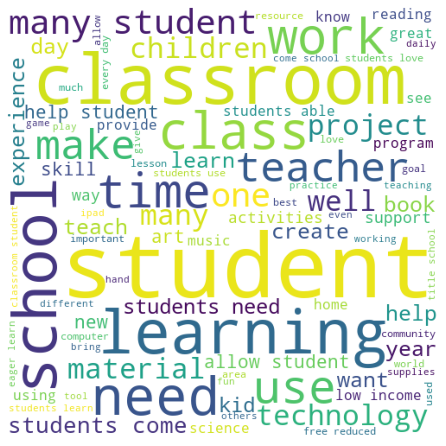

In [0]:
print('WordCloud with essay text for cluster1 for AgglomerativeClustering')
wordcloud(cluster1)

The most frequent words in cluster1 for agglomerative clustering are(in descending order): student, learning, classroom, need, school, class, teacher, time.

WordCloud with essay text for cluster2 for AgglomerativeClustering


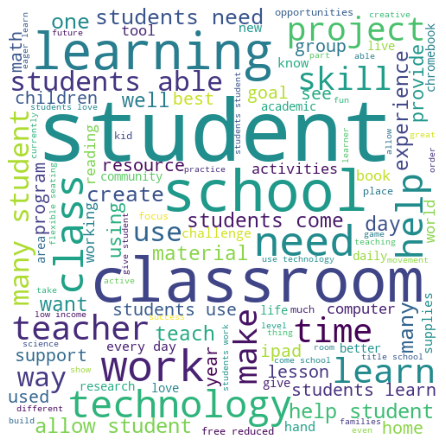

In [0]:
print('WordCloud with essay text for cluster2 for AgglomerativeClustering')
wordcloud(cluster2)

 The most frequent words in cluster1 for agglomerative clustering are(in descending order):  student, learning, classroom, school, technology, work.

WordCloud with essay text for cluster3 for AgglomerativeClustering


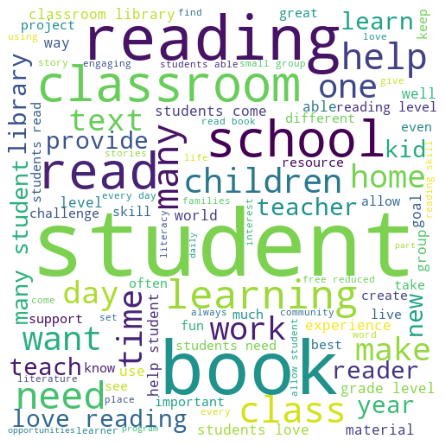

In [0]:
print('WordCloud with essay text for cluster3 for AgglomerativeClustering')
wordcloud(cluster3)

The most frequent words in cluster3 for agglomerative clustering are(in descending order):  Student, book, reading, classroom, school, read.

WordCloud with essay text for cluster4 for AgglomerativeClustering


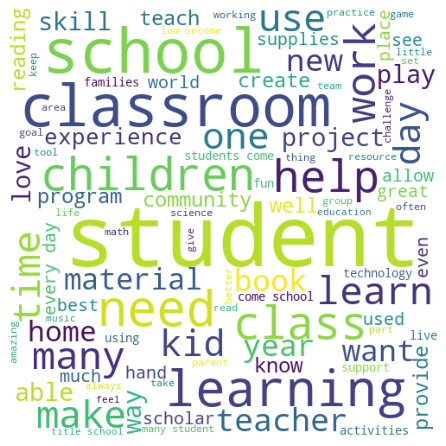

In [0]:
print('WordCloud with essay text for cluster4 for AgglomerativeClustering')
wordcloud(cluster4)

The most frequent words in cluster4 for agglomerative clustering are(in descending order): student, classroom, school, learning, children, need, help.

<h2>2.7 Apply DBSCAN</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [0]:
X_new1= X_new[:5000]
X_new1.shape

(5000, 5000)

In [0]:
#Calculating the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors.
#[https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc]
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_new1)
distances, indices = nbrs.kneighbors(X_new1)


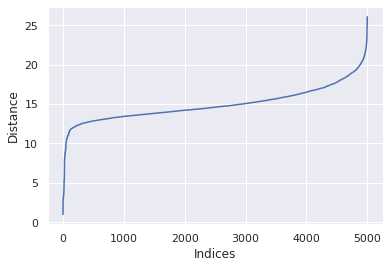

In [0]:
#we sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.plot(distances)


We get maximum curvature near distance value of 19. So optimal value of epsilon chosen is 19.



Reference : https://stackoverflow.com/a/48558030

MinPts is best set by a domain expert who understands the data well. Unfortunately many cases we don't know the domain knowledge, especially after data is normalized. One heuristic approach is use "ln(n)", where n is the total number of points to be clustered.

So, ln(5000) = 8.517

Hence taking Minpts = 9

In [0]:
from sklearn.cluster import DBSCAN
min_pts = 9
dbscan = DBSCAN(eps=19, min_samples= min_pts).fit(X_new1)


In [0]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
np.unique(dbscan.labels_)

array([-1,  0])

There are two clusters. The noisy ones are indicated by -1.


In [0]:
essay = preprocessed_essays
cluster1=[]
cluster2=[]

for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(essay[i])
    elif dbscan.labels_[i]== -1 :
        cluster2.append(essay[i])
  

In [0]:
print('Length of cluster1 is', len(cluster1))
print('Length of cluster2 is', len(cluster2))

Length of cluster1 is 4749
Length of cluster2 is 251


WordCloud with essay text for cluster1 for DBSCAN Clustering


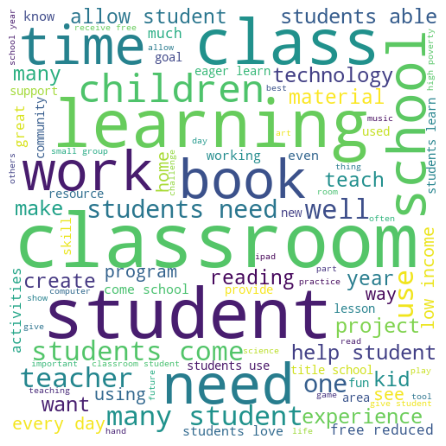

In [0]:
print('WordCloud with essay text for cluster1 for DBSCAN Clustering')
wordcloud(cluster1)

The most frequent words in cluster1 for DBSCAN clustering are(in descending order): classroom, learning, student, class, time, work, book, need, school.

WordCloud with essay text for cluster2 for DBSCAN Clustering


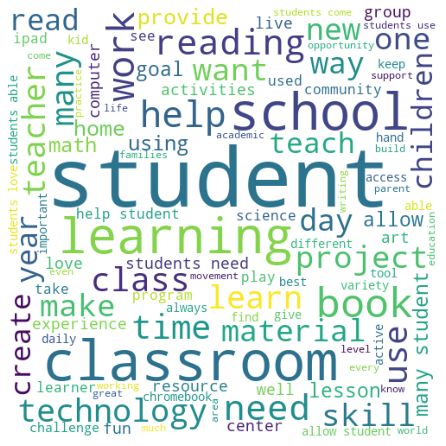

In [0]:
print('WordCloud with essay text for cluster2 for DBSCAN Clustering')
wordcloud(cluster2)

The most frequent words in cluster2 i.e. noise cluster for DBSCAN clustering are(in descending order):  student, learning, classroom, school, reading, technology.

*italicized text*<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

##### K-Means Clustering:
The clusters are approximately similar in size. There is slight variation in the densities of clusters. 
Some of the most common words observed from each cluster in KMeans clustering are: student, classroom, learning, need, work.

##### Agglomerative Clustering:
The clusters in agglomerative clustering are slightly more variations in size. Some variations in the densties of the clusters can also be observed, probably a large cluster may have broken into smaller clusters. 
Some of the most common words observed from each cluster in Agglomerative clustering are: Student, learning ,classroom, school, book.

##### DBSCAN Clustering:
The clusters in DBSCAN clustering are completely of different sizes. The cluster with label -1 indicates the noise cluster which is small in size. And also in noise cluster there are few words that are frequently present in that cluster, most of the words are smaller in size which means these words are very less commonly used in the essay text.
Some of the most common words observed from each cluster in DBSCAN clustering are: classroom, learning, student, school.

